In [ ]:
#PCA--Principal Component Analysis- Dimensionality reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns",500)

In [4]:
data=pd.read_csv("data.csv")

In [5]:
df=data.copy()

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.shape

(569, 33)

In [8]:
df["diagnosis"]=df["diagnosis"].map({"M":1,"B":0})

In [9]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
X=df.drop("diagnosis",axis=1)
Y=df["diagnosis"]

In [ ]:
# scaling is most important in PCA- it is highly sensitive if not scaled.

In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [13]:
scale=MinMaxScaler()

In [33]:
X_scaled1=scale.fit_transform(X)

In [34]:
X_scaled1

array([[9.14760426e-04, 5.21037437e-01, 2.26580994e-02, ...,
        9.12027491e-01, 5.98462448e-01, 4.18863964e-01],
       [9.14996350e-04, 6.43144493e-01, 2.72573554e-01, ...,
        6.39175258e-01, 2.33589592e-01, 2.22878132e-01],
       [9.24954884e-02, 6.01495575e-01, 3.90260399e-01, ...,
        8.35051546e-01, 4.03705894e-01, 2.13433032e-01],
       ...,
       [1.00765069e-03, 4.55251077e-01, 6.21237741e-01, ...,
        4.87285223e-01, 1.28720678e-01, 1.51908697e-01],
       [1.00796562e-03, 6.44564343e-01, 6.63510315e-01, ...,
        9.10652921e-01, 4.97141731e-01, 4.52315361e-01],
       [9.22636984e-05, 3.68687586e-02, 5.01521813e-01, ...,
        0.00000000e+00, 2.57441356e-01, 1.00682146e-01]])

In [35]:
X_scaled=pd.DataFrame(X_scaled1,columns=X.columns)
X_scaled.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [83]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=101,stratify=Y)

# Keeping all variables before PCA approach 

In [20]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [21]:
Y_predict_rf=rf.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,accuracy_score

In [23]:
accuracy_score(Y_test,Y_predict_rf)

0.9473684210526315

# Apply the PCA Concept

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca_concept=PCA()

In [26]:
pca_concept=pca_concept.fit(X_scaled)

In [27]:
pca_concept.explained_variance_ratio_

array([5.15558653e-01, 1.67945621e-01, 6.92129714e-02, 6.25253784e-02,
       3.96878033e-02, 3.15786679e-02, 2.75114209e-02, 1.53106337e-02,
       1.12234174e-02, 9.33630472e-03, 9.10848436e-03, 8.21919150e-03,
       7.35201623e-03, 6.37317537e-03, 4.60907647e-03, 2.61378996e-03,
       2.50205496e-03, 1.78246596e-03, 1.46393459e-03, 1.33266309e-03,
       1.02852738e-03, 9.53721063e-04, 7.54442531e-04, 5.12351989e-04,
       4.93975938e-04, 4.17036810e-04, 3.19934121e-04, 1.84197305e-04,
       5.42727833e-05, 2.80264995e-05, 5.78970419e-06])

In [28]:
len(pca_concept.explained_variance_ratio_)

31

In [ ]:
#plot a graph

Text(0, 0.5, 'Explained variance ratio or amount of info')

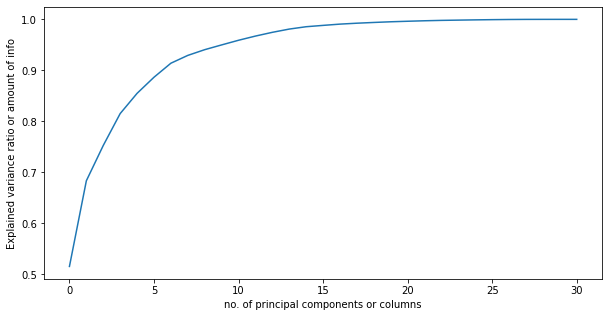

In [29]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca_concept.explained_variance_ratio_))
plt.xlabel("no. of principal components or columns")
plt.ylabel("Explained variance ratio or amount of info")

In [48]:
pca_1=PCA(n_components=20)

In [49]:
X_pca_applied=pca_1.fit_transform(X_scaled)

In [50]:
len(X_pca_applied)

569

In [51]:
X_pca_applied

array([[ 1.38616177,  0.42939168, -0.54190145, ..., -0.03679396,
         0.03345016, -0.06220363],
       [ 0.46182811, -0.55488792, -0.21011401, ..., -0.00186607,
        -0.03166444,  0.03933939],
       [ 0.95546328, -0.11080069, -0.14537466, ..., -0.0274518 ,
         0.01810611,  0.01992186],
       ...,
       [ 0.22585957, -0.28677719,  0.31126719, ..., -0.01593593,
        -0.01245789,  0.02269142],
       [ 1.67700509,  0.33824634,  0.28743556, ..., -0.02125929,
         0.02288034, -0.06163086],
       [-0.90542531, -0.10396778,  0.38215783, ..., -0.01281726,
        -0.00918062, -0.07087372]])

In [52]:
X_pca_applied_df=pd.DataFrame(X_pca_applied)

In [53]:
X_pca_applied_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.386162,0.429392,-0.541901,0.062188,-0.070098,-0.153312,0.114014,0.237930,-0.023534,0.132714,0.111853,0.097180,0.029447,-0.041694,-0.125873,-0.137038,0.002327,-0.036794,0.033450,-0.062204
1,0.461828,-0.554888,-0.210114,-0.041684,0.017889,-0.034807,-0.015969,0.044138,0.021685,-0.114396,-0.032817,0.069991,-0.131334,0.166475,-0.054818,0.067463,-0.050358,-0.001866,-0.031664,0.039339
2,0.955463,-0.110801,-0.145375,0.007117,-0.035541,-0.021394,0.079964,-0.111600,-0.009282,-0.079472,-0.045601,0.036932,0.060431,0.012617,-0.023390,0.040410,0.080826,-0.027452,0.018106,0.019922
3,1.001248,1.523292,-0.052679,-0.196505,-0.221737,-0.219232,0.340373,0.186053,0.163691,0.084744,-0.191933,0.142580,0.204446,0.128700,-0.027534,0.014867,0.018624,0.032144,0.030824,0.005137
4,0.627779,-0.303873,-0.398908,0.255820,-0.005721,0.147471,-0.068941,-0.065949,0.038163,0.006231,-0.005943,-0.126367,-0.072480,0.031493,-0.058819,0.039740,-0.023101,0.047442,0.018638,-0.044094


In [54]:
X_pca_applied_df.shape

(569, 20)

In [55]:
X_train_PCA,X_test_PCA,Y_train_PCA,Y_test_PCA=train_test_split(X_pca_applied_df,Y,test_size=0.2,random_state=101,stratify=Y)

In [56]:
rf=RandomForestClassifier()
rf.fit(X_train_PCA,Y_train_PCA)

RandomForestClassifier()

In [57]:
Y_predict_rf_PCA=rf.predict(X_test_PCA)

In [58]:
accuracy_score(Y_test_PCA,Y_predict_rf_PCA)

0.9210526315789473

# MATHEMATICS BEHIND PCA

In [ ]:
#X_scaled --- original scalled data

In [ ]:
#step 1:- calculate the covariance matrix.

In [59]:
covariance_matrix=X_scaled.cov()

In [60]:
covariance_matrix

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,0.018820,0.001708,0.001991,0.001685,0.001984,-0.000226,0.000002,0.001283,0.001168,-0.000420,-0.001071,0.001971,-0.000126,0.001795,0.002072,0.001355,0.000627,0.000578,0.001263,-0.000276,0.000323,0.001944,0.001454,0.001836,0.002058,0.000214,-0.000062,0.000530,0.001090,-0.000740,-0.000485
radius_mean,0.001708,0.027818,0.007855,0.027946,0.024582,0.003612,0.013675,0.021083,0.026458,0.003412,-0.007729,0.011374,-0.001979,0.010712,0.010428,-0.003789,0.004621,0.002469,0.007333,-0.002024,-0.000650,0.027804,0.008115,0.026939,0.021964,0.003008,0.010527,0.014644,0.028038,0.003335,0.000140
texture_mean,0.001991,0.007855,0.021156,0.008048,0.006972,-0.000432,0.005577,0.008216,0.008232,0.001438,-0.001653,0.004029,0.006851,0.003903,0.003211,0.000098,0.003756,0.001589,0.002786,0.000154,0.000724,0.008818,0.021731,0.008715,0.006992,0.001700,0.006169,0.007296,0.009703,0.001863,0.002054
perimeter_mean,0.001685,0.027946,0.008048,0.028195,0.024727,0.004419,0.015149,0.022461,0.027558,0.004255,-0.006529,0.011665,-0.001776,0.011088,0.010629,-0.003474,0.005663,0.002919,0.007992,-0.001594,-0.000085,0.027990,0.008336,0.027269,0.022123,0.003812,0.011682,0.015777,0.029253,0.003873,0.001015
area_mean,0.001984,0.024582,0.006972,0.024727,0.022283,0.003355,0.012054,0.019127,0.023701,0.003127,-0.006284,0.010981,-0.001206,0.010333,0.010148,-0.002541,0.004268,0.002363,0.006496,-0.001259,-0.000271,0.024710,0.007030,0.023960,0.020036,0.002780,0.008896,0.012751,0.024345,0.002614,0.000066
smoothness_mean,-0.000226,0.003612,-0.000432,0.004419,0.003355,0.016121,0.013557,0.012379,0.013558,0.009805,0.011041,0.003844,0.001059,0.003581,0.002660,0.004307,0.005447,0.002404,0.005649,0.002965,0.003292,0.004653,0.000750,0.005075,0.003673,0.015417,0.009157,0.009202,0.014427,0.006106,0.007510
compactness_mean,0.000002,0.013675,0.005577,0.015149,0.012054,0.013557,0.026242,0.026721,0.025966,0.013517,0.013619,0.008093,0.000913,0.008471,0.006272,0.002237,0.016095,0.007045,0.012161,0.004333,0.007513,0.014910,0.006585,0.016000,0.011552,0.013813,0.021410,0.022034,0.029843,0.010080,0.013191
concavity_mean,0.001283,0.021083,0.008216,0.022461,0.019127,0.012379,0.026721,0.034889,0.033191,0.012948,0.009354,0.011853,0.001736,0.011751,0.009799,0.001879,0.016839,0.009842,0.014917,0.003867,0.007672,0.022103,0.009176,0.022805,0.017668,0.012640,0.021526,0.027517,0.036341,0.009327,0.011394
concave points_mean,0.001168,0.026458,0.008232,0.027558,0.023701,0.013558,0.025966,0.033191,0.037194,0.012350,0.004787,0.013519,0.000505,0.013057,0.011312,0.000544,0.012721,0.006456,0.013878,0.002139,0.004541,0.027533,0.009249,0.027625,0.021849,0.013165,0.019649,0.024179,0.039649,0.008837,0.008423
symmetry_mean,-0.000420,0.003412,0.001438,0.004255,0.003127,0.009805,0.013517,0.012948,0.012350,0.019170,0.009881,0.004218,0.002162,0.004140,0.002635,0.002647,0.007852,0.003616,0.006365,0.007233,0.004199,0.004421,0.002056,0.005078,0.003433,0.008907,0.010001,0.010007,0.013458,0.011817,0.007191


In [61]:
covariance_matrix.shape

(31, 31)

In [62]:
eigen_value1,eigen_vector1=np.linalg.eig(covariance_matrix)

In [63]:
eigen_value1

array([3.31415811e-01, 1.07960237e-01, 4.44920727e-02, 4.01930971e-02,
       2.55124523e-02, 2.02996687e-02, 1.76851262e-02, 9.84211218e-03,
       7.21473289e-03, 6.00164304e-03, 5.85519362e-03, 5.28353079e-03,
       4.72608579e-03, 4.09685896e-03, 2.96284585e-03, 1.68021876e-03,
       1.60839231e-03, 1.14581997e-03, 9.41058920e-04, 8.56673855e-04,
       6.61166742e-04, 6.13079109e-04, 4.84977184e-04, 3.72178704e-06,
       1.80162335e-05, 3.48880935e-05, 1.18407283e-04, 2.05662781e-04,
       2.68083160e-04, 3.29354476e-04, 3.17541826e-04])

In [64]:
len(eigen_value1)

31

In [65]:
eigen_vector1

array([[ 1.61882458e-02, -3.50964550e-02,  6.25444034e-02,
         9.17623192e-02,  4.72635655e-02,  6.40881960e-01,
        -7.30413635e-01,  4.66185865e-02, -1.25694716e-01,
        -1.02074956e-01, -9.08343516e-02,  4.26680301e-02,
         1.87038155e-02, -7.13123133e-03,  1.07586169e-03,
         7.96315348e-03,  1.02732621e-03, -7.03188844e-03,
        -1.29606501e-02, -1.28864226e-02, -1.27171853e-03,
        -4.56819179e-03, -1.64366384e-02, -8.70060109e-05,
         9.53097915e-04,  1.65363482e-04,  5.49411456e-03,
         1.12092983e-03, -4.16073550e-03, -3.00207061e-03,
         6.48823943e-03],
       [ 2.42686121e-01, -2.60838712e-01, -5.99018995e-02,
         3.88357336e-02, -2.21827997e-03, -3.80072947e-02,
         1.53355899e-02, -2.21834755e-03, -1.66426470e-02,
         4.41050479e-03, -2.47389777e-01, -6.99298808e-02,
         1.22335054e-01, -4.00470398e-02,  1.08086288e-01,
        -1.92455426e-01,  7.27694511e-02,  2.97704311e-01,
        -1.23766761e-02,  3.64

In [66]:
len(eigen_vector1)

31

In [69]:
imp1=pd.DataFrame(eigen_value1)

In [70]:
imp1.head()

,0
0,0.331416
1,0.107960
2,0.044492
3,0.040193
4,0.025512


In [71]:
imp2=pd.DataFrame(eigen_vector1)

In [72]:
imp2.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.016188,-0.035096,0.062544,0.091762,0.047264,0.640882,-0.730414,0.046619,-0.125695,-0.102075,-0.090834,0.042668,0.018704,-0.007131,0.001076,0.007963,0.001027,-0.007032,-0.012961,-0.012886,-0.001272,-0.004568,-0.016437,-0.000087,0.000953,0.000165,0.005494,0.001121,-0.004161,-0.003002,0.006488
1,0.242686,-0.260839,-0.059902,0.038836,-0.002218,-0.038007,0.015336,-0.002218,-0.016643,0.004411,-0.247390,-0.069930,0.122335,-0.040047,0.108086,-0.192455,0.072769,0.297704,-0.012377,0.036436,-0.044876,-0.061255,-0.137431,-0.705092,0.196675,-0.147173,-0.129899,-0.153616,-0.099253,-0.054572,0.061218
2,0.096551,-0.059582,0.596599,-0.052278,0.021732,0.003935,0.008583,-0.019397,-0.046860,0.285044,-0.079787,-0.267527,-0.319547,-0.013368,0.011432,-0.236293,0.129188,-0.134457,-0.071227,-0.094593,0.407165,-0.286930,0.070536,-0.000297,-0.011887,-0.002879,-0.030884,0.023544,0.046833,0.036890,0.028303
3,0.252554,-0.238120,-0.059495,0.045197,-0.005873,-0.037402,0.017834,-0.012705,-0.035375,-0.006564,-0.250425,-0.080816,0.094998,-0.008061,0.087089,-0.156068,0.068943,0.314228,-0.030442,0.011743,-0.061719,-0.057841,-0.119289,0.686412,0.360618,-0.054252,-0.152934,-0.079138,0.008862,-0.006596,0.024191
4,0.216527,-0.230859,-0.050198,0.078425,0.030920,-0.005042,0.013192,-0.085812,0.027149,-0.030503,-0.122935,-0.114772,0.106418,-0.070373,0.021019,-0.132819,0.038109,0.256360,-0.041747,0.330335,0.112111,0.077392,0.191622,0.038286,-0.443500,0.225563,0.516367,0.191324,0.019046,-0.007019,-0.179763
5,0.109626,0.199931,-0.123606,-0.028630,0.411963,0.150948,0.179852,0.058660,-0.171041,-0.062902,-0.105970,0.002599,-0.157930,0.088088,0.564713,-0.219206,-0.011523,-0.255686,0.344795,0.181303,-0.140141,-0.061316,0.024445,0.006389,-0.003506,-0.004835,0.045319,-0.007851,0.119065,-0.011794,0.041918
6,0.240290,0.214166,-0.039722,0.028214,-0.036308,-0.015970,0.036257,-0.134702,-0.217469,0.011096,-0.270662,-0.008984,-0.185455,0.311918,-0.038502,0.314743,0.134868,0.167693,-0.064349,-0.313206,-0.270821,-0.170847,0.262761,-0.046069,-0.038098,0.002980,0.103101,0.143519,-0.148184,0.376448,0.037318
7,0.301856,0.113909,-0.015637,0.122284,-0.116392,0.018448,0.044227,0.135117,-0.118698,-0.307953,0.185459,-0.428248,-0.064558,-0.061600,-0.086111,0.145572,-0.157558,0.057975,0.029279,-0.138004,0.042728,0.090017,0.167120,-0.022553,-0.005820,-0.029301,0.088781,-0.396652,0.445789,-0.120413,0.132424
8,0.322411,-0.007886,-0.085162,0.077645,0.106340,0.014938,0.104225,0.150039,-0.237183,-0.105843,-0.122179,-0.079643,-0.156635,-0.055839,-0.293031,-0.004120,-0.419570,-0.157437,0.132434,-0.066217,0.236661,0.259593,-0.195847,0.000933,-0.005182,0.000006,-0.148916,0.298451,-0.351443,-0.029333,-0.124039
9,0.111353,0.211204,-0.041399,0.060434,0.308530,-0.367399,-0.313636,0.093574,-0.365022,0.364870,0.202287,-0.177602,0.368102,0.165046,-0.062022,-0.115703,0.085936,-0.071205,-0.214038,0.054919,-0.069884,0.108844,-0.013719,0.001556,-0.008648,-0.002833,-0.015435,0.005086,0.000841,-0.049315,0.023212


In [ ]:
# now we will sort EigenVectors EigenValues

In [73]:
sorted_key=np.argsort(eigen_value1)[::-1][:2]

In [74]:
sorted_key

array([0, 1], dtype=int64)

In [76]:
eigen_values,eign_vector=eigen_value1[sorted_key],eigen_vector1[:,sorted_key]

In [77]:
eigen_values

array([0.33141581, 0.10796024])

In [78]:
eign_vector

array([[ 1.61882458e-02, -3.50964550e-02],
       [ 2.42686121e-01, -2.60838712e-01],
       [ 9.65507687e-02, -5.95818038e-02],
       [ 2.52554088e-01, -2.38119869e-01],
       [ 2.16527103e-01, -2.30859079e-01],
       [ 1.09626413e-01,  1.99930972e-01],
       [ 2.40290382e-01,  2.14165948e-01],
       [ 3.01855506e-01,  1.13908650e-01],
       [ 3.22410935e-01, -7.88587061e-03],
       [ 1.11352549e-01,  2.11203877e-01],
       [ 4.32005331e-02,  4.06158961e-01],
       [ 1.21820024e-01, -6.72478932e-02],
       [-4.19369915e-05,  5.97180252e-02],
       [ 1.18631160e-01, -5.17340847e-02],
       [ 1.03640381e-01, -8.33267319e-02],
       [-4.62015153e-03,  1.34761415e-01],
       [ 1.29289046e-01,  2.21987228e-01],
       [ 6.56788039e-02,  1.02532600e-01],
       [ 1.24756792e-01,  1.05257952e-01],
       [ 1.44644331e-02,  1.40261788e-01],
       [ 4.54905744e-02,  1.71625808e-01],
       [ 2.59401062e-01, -2.43861559e-01],
       [ 1.13869434e-01, -3.99803283e-02],
       [ 2.

In [ ]:
# dot product of original data and eigen vectors are the principal component
# this is the projection step of the original points on to the principal component.

In [80]:
principal_components=np.dot(X_scaled,eigen_vector1)

In [81]:
principal_components

array([[ 2.59025281,  0.76470702, -0.22145763, ...,  0.0320268 ,
        -0.0379867 ,  0.02188197],
       [ 1.66591914, -0.21957258,  0.11032981, ...,  0.0213194 ,
        -0.01683693,  0.06209952],
       [ 2.15955432,  0.22451465,  0.17506916, ..., -0.00570533,
        -0.03912244,  0.01496535],
       ...,
       [ 1.4299506 ,  0.04853815,  0.63171101, ...,  0.00746664,
        -0.04370523,  0.03362272],
       [ 2.88109613,  0.67356168,  0.60787937, ...,  0.03672428,
        -0.09243757,  0.00442921],
       [ 0.29866573,  0.23134756,  0.70260165, ..., -0.01662035,
        -0.01351828,  0.00743467]])

# new about ensemble learning

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=101,stratify=Y)

In [ ]:
rf10=RandomForestClassifier(max_features=2)


In [ ]:
bg10=BaggingClassifier(max_features=2)

In [ ]:
rf.fit(X_train,Y_train)